In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import neuralNets as NN

# Dataset Creation

In [27]:
num_points = 70
np.random.seed(42)
data1 = np.random.uniform(low=0, high=5, size=(num_points,2))
data2 = np.random.uniform(low=5, high=10, size=(num_points,2))
labels = np.array([1] * num_points + [-1] * num_points)

# Training Perceptron

In [28]:
dataset = np.vstack((data1, data2))
perceptron = NN.Perceptron(size=2)
alpha = 0.01
perceptron.train(alpha, dataset, labels, epochs=70)

# Results

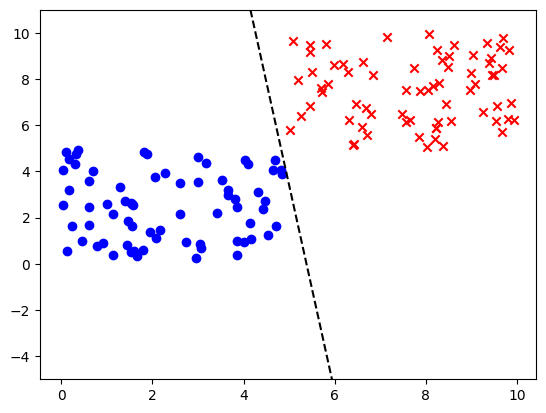

In [29]:
plt.scatter(data1[:, 0], data1[:, 1], c='blue', marker='o', label='Class 1')
plt.scatter(data2[:, 0], data2[:, 1], c='red', marker='x', label='Class -1')
x_vals = np.linspace(min(dataset[:, 0]), max(dataset[:, 0]), 50)
y_vals = (-perceptron.weights[0] * x_vals + perceptron.threshold) / perceptron.weights[1]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.ylim(-5, 11)
plt.show()

# Video 

MovieWriter imagemagick unavailable; using Pillow instead.


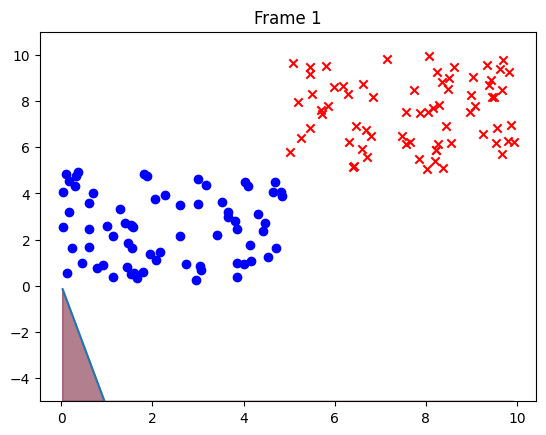

In [30]:
from matplotlib.animation import FuncAnimation

x = np.linspace(min(dataset[:, 0]), max(dataset[:, 0]), 50)
fig, ax = plt.subplots()
cmap = plt.get_cmap("RdBu")
def update(frame):
    perceptron = NN.Perceptron(size=2)
    perceptron.train(0.01, dataset, labels, epochs=frame)    
    ax.clear()
    y = (-perceptron.weights[0] * x + perceptron.threshold) / perceptron.weights[1]

    plt.scatter(data1[:, 0], data1[:, 1], c='blue', marker='o', label='Class 1')
    plt.scatter(data2[:, 0], data2[:, 1], c='red', marker='x', label='Class -1')
    gradient = np.linspace(0, 1, len(x_vals))
    ax.fill_between(x, -5, y, color=cmap(gradient), alpha=0.5)
    ax.set_ylim(-5, 11)
    ax.plot(x, y)
    ax.set_title(f'Frame {frame}')

anim = FuncAnimation(fig, update, frames=range(1, 70), interval=200)
anim.save('evolution.gif', writer='imagemagick')